In [17]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
czas = []

<H1>Przygotowanie zbioru danych: XOR<H1>

In [ ]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

In [ ]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

In [ ]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

In [ ]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

In [ ]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [ ]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

In [ ]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4 ...). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, ważne żeby było widać jaka jest zależność.

In [ ]:
%matplotlib auto

In [2]:
%matplotlib inline

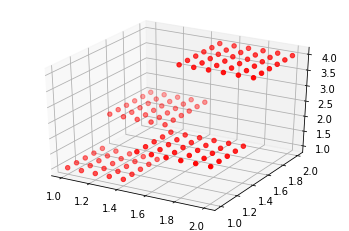

In [18]:
x = np.arange(1, 2.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.multiply(np.round(dataX),np.round(dataY))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

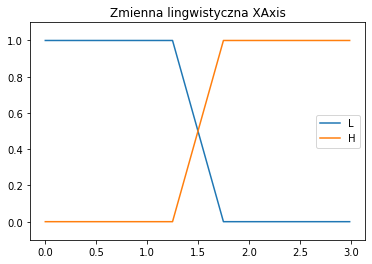

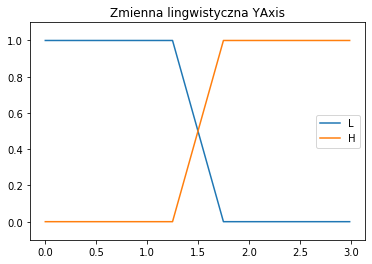

In [19]:
varX = FuzzyInputVariable_2Trapezoids(1.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(1.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

Parametry początkowe:
Przesłanki:  [[1.5, 0.5], [1.5, 0.5]] 
Konkluzje:  [[0.83354711 0.26622142 0.96859515]
 [0.97710412 0.01587805 0.33337731]
 [0.59431903 0.31536063 0.90193512]
 [0.17935969 0.28567212 0.23037637]]


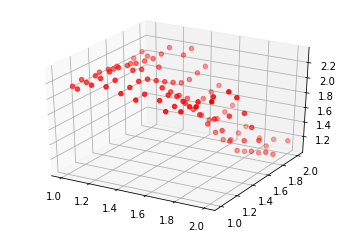

In [20]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

Optymalizacja zakończona!
z blędem:   3.428578319980331
Liczba ew:  106736
Liczba it:  100
TIME elapsed:  30.075711488723755


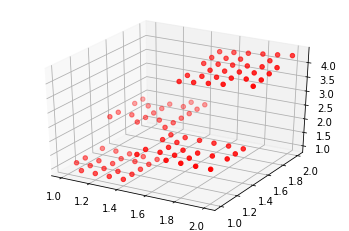

In [22]:
start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()


czas.append(end-start)

print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

In [23]:
czas

[30.075711488723755]

In [ ]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [ ]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

In [ ]:
fis.premises = [[ 1.45462313, -0.05206001], [ 1.45118139, -0.09198265]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
fis.tsk = [[5.71428299e-01, 5.71428652e-01, 2.00000000e+00],
 [7.81216873e-07, 7.88496429e-20, 1.99999896e+00],
 [1.41753706e-08, 1.06690462e-16, 2.00000000e+00],
 [3.27373199e-08, 2.29266611e-09, 9.99999999e-01]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

# ZADANIE 2 : 3x3

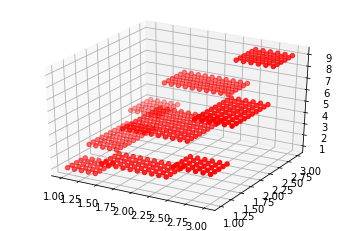

In [24]:
x = np.arange(1, 3.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.multiply(np.round(dataX),np.round(dataY))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

Utworzenie funkcji przynależności

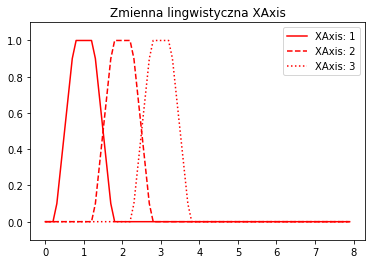

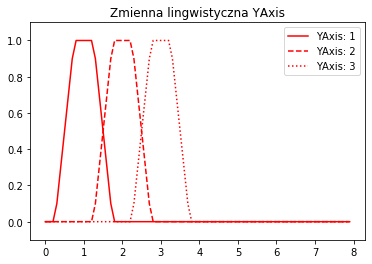

In [25]:
#varX = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 0.25, 0.25, "XAxis", ["L","H"]) # low, high
#varY = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 0.25, 0.25, "YAxis", ["L","H"])


mf1 = [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2","3"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2","3"])


x = np.arange(0,8,0.1)
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(x)
plt.legend()

plt.figure()
varY.show(x)
plt.legend()

plt.show()

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.96980729 0.6018929  0.46160439]
 [0.14511471 0.72175383 0.19637694]
 [0.82790425 0.58924483 0.38670053]
 [0.40924526 0.35241438 0.30668248]
 [0.33972468 0.95876131 0.02896888]
 [0.87714585 0.68424521 0.9918089 ]
 [0.56521795 0.6078645  0.40134064]
 [0.20220772 0.62762065 0.63595279]
 [0.76883654 0.83454232 0.04312199]]


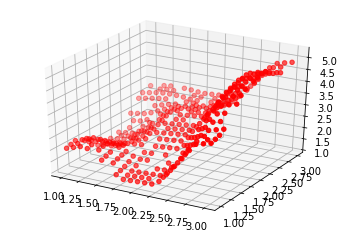

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

Optymalizacja zakończona!
z blędem:   10.449693246784566
Liczba ew:  450781
Liczba it:  100
TIME elapsed:  262.98733353614807


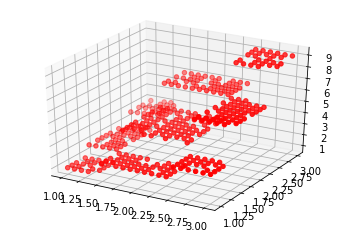

In [28]:
start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()

czas.append(end-start)

print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

In [29]:
czas

[30.075711488723755, 262.98733353614807]

In [ ]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Wyświetlanie funkcji przynależnosci

plt.figure()
varX.show(x)
plt.legend()

plt.figure()
varY.show(x)
plt.legend()

plt.show()

In [ ]:
#Sprawdzanie wpływu parametrów na wyniki systemu
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

In [ ]:
fis.premises = [[[2.67585908e+00, 2.45698383e+00, 4.43306039e-02, 1.12659307e+00],
  [2.40828203e+00, 2.23566106e-02, 1.85549771e+00, 8.05865525e-02],
  [3.99999728e+00, 3.95431777e-13, 1.59768662e+00, 2.23847444e+00]],
 [[2.41718034e+00, 4.21259347e-02, 2.07576583e+00, 6.18021207e-02],
  [3.29802458e+00, 3.65260704e+00, 1.03638192e-02, 1.16801097e+00],
  [4.00000000e+00, 0.00000000e+00, 1.59614629e+00, 1.52804641e-14]]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
fis.tsk =  [[5.38919880e-01, 0.00000000e+00, 1.70815051e+00],
 [1.18570491e-15, 2.70606221e-14, 1.00000116e+00],
 [4.44892641e-02, 7.62675786e-04, 2.00000000e+00],
 [1.54395388e+00, 1.36778608e+00, 2.00000000e+00],
 [0.00000000e+00, 4.81737786e-01, 1.84570343e+00],
 [1.37378303e-01, 1.75347426e+00, 2.00000000e+00],
 [1.88652015e+00, 1.15395562e-01, 2.00000000e+00],
 [1.24847921e-02, 7.10425762e-02, 2.00000000e+00],
 [1.41092194e-02, 2.56148215e-01, 1.98967297e+00]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

# ZADANIE 3 : 4x4

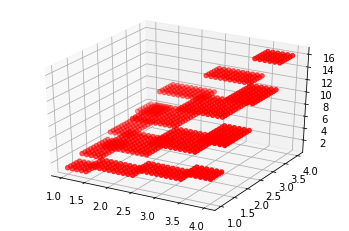

In [30]:
x = np.arange(1, 4.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.multiply(np.round(dataX),np.round(dataY))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

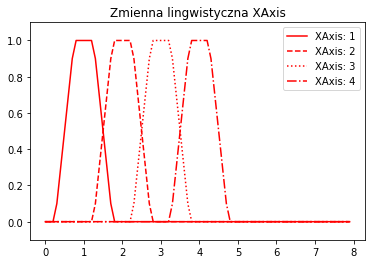

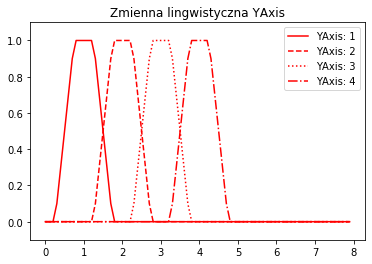

In [31]:
#varX = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 0.25, 0.25, "XAxis", ["L","H"]) # low, high
#varY = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 0.25, 0.25, "YAxis", ["L","H"])


mf1 = [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2","3","4"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2","3","4"])


#Wyświetlanie funkcji przynależnosci
x = np.arange(0,8,0.1)
plt.figure()
varX.show(x)
plt.legend()

plt.figure()
varY.show(x)
plt.legend()

plt.show()

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[2.32070153e-01 1.42364987e-01 7.95714148e-01]
 [1.62746855e-01 4.97049795e-01 1.12113269e-02]
 [9.67724517e-01 9.70107764e-01 4.46937486e-01]
 [3.93498020e-01 5.13338974e-01 6.65762533e-01]
 [8.10265046e-01 6.59737852e-01 7.57752932e-01]
 [8.08896032e-01 2.65794304e-01 5.54565947e-01]
 [2.28285818e-01 9.25782388e-01 7.71237524e-01]
 [4.94292950e-01 4.70552901e-01 1.48001760e-01]
 [6.07335700e-01 5.44817528e-01 6.64500179e-01]
 [6.16688668e-01 7.93725752e-01 9.02326618e-01]
 [8.19850153e-01 3.40080480e-01 4.83037679e-01]
 [2.37323455e-01 4.46395793e-01 3.61748709e-01]
 [6.43697173e-01 6.46232164e-01 8.21345593e-01]
 [3.04375246e-01 5.17034585e-01 6.78465628e-01]
 [7.95279314e-04 1.59186237e-01 5.56659236e-01]
 [2.31633238e-01 9.18180561e-01 9.56191301e-01]]


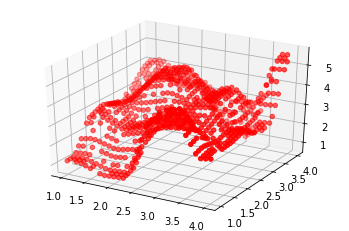

In [32]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

Optymalizacja zakończona!
z blędem:   38.051840334895246
Liczba ew:  789281
Liczba it:  100
TIME elapsed:  890.5713284015656


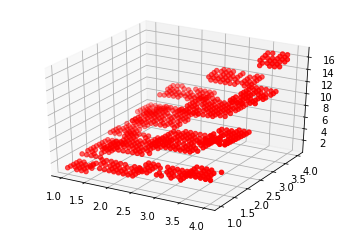

In [33]:
start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()

czas.append(end-start)

print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

In [34]:
czas

[30.075711488723755, 262.98733353614807, 890.5713284015656]

In [ ]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Wyświetlanie funkcji przynależnosci

plt.figure()
varX.show(x)
plt.legend()

plt.figure()
varY.show(x)
plt.legend()

plt.show()

In [ ]:
#Sprawdzanie wpływu parametrów na wyniki systemu
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

In [ ]:
fis.premises = [[[2.67585908e+00, 2.45698383e+00, 4.43306039e-02, 1.12659307e+00],
  [2.40828203e+00, 2.23566106e-02, 1.85549771e+00, 8.05865525e-02],
  [3.99999728e+00, 3.95431777e-13, 1.59768662e+00, 2.23847444e+00]],
 [[2.41718034e+00, 4.21259347e-02, 2.07576583e+00, 6.18021207e-02],
  [3.29802458e+00, 3.65260704e+00, 1.03638192e-02, 1.16801097e+00],
  [4.00000000e+00, 0.00000000e+00, 1.59614629e+00, 1.52804641e-14]]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
fis.tsk =  [[5.38919880e-01, 0.00000000e+00, 1.70815051e+00],
 [1.18570491e-15, 2.70606221e-14, 1.00000116e+00],
 [4.44892641e-02, 7.62675786e-04, 2.00000000e+00],
 [1.54395388e+00, 1.36778608e+00, 2.00000000e+00],
 [0.00000000e+00, 4.81737786e-01, 1.84570343e+00],
 [1.37378303e-01, 1.75347426e+00, 2.00000000e+00],
 [1.88652015e+00, 1.15395562e-01, 2.00000000e+00],
 [1.24847921e-02, 7.10425762e-02, 2.00000000e+00],
 [1.41092194e-02, 2.56148215e-01, 1.98967297e+00]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

wykres czasu

[30.075711488723755, 262.98733353614807, 890.5713284015656]
Złożoność czasowa uczenia się systemu ANFIS w zależności od wymiarów tabliczki została przez mnie oszacowana jako O(n^3) 


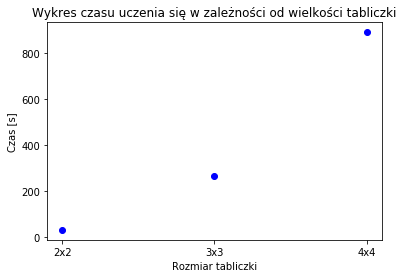

In [36]:
print(czas)
plt.plot(['2x2','3x3','4x4'],czas, 'bo')
plt.ylabel('Czas [s]')
plt.xlabel('Rozmiar tabliczki')
plt.title("Wykres czasu uczenia się w zależności od wielkości tabliczki")
print('Złożoność czasowa uczenia się systemu ANFIS w zależności od wymiarów tabliczki została przez mnie oszacowana jako O(n^3) ')